<a href="https://colab.research.google.com/github/ichowdhury10/DataScienceProjects/blob/main/ExploratoryAnalysisAirBnB_NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AirBnB Exploratory Data Analysis**

Libaries: folium, matplotlib, pandas, numPy, plotly, seaborn, and time

Data Description:
- AirBnB Listing Data from New York City
- 18 Attributes
- 31,198 Data Points

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import folium as fl
from folium.plugins import HeatMap

In [ ]:
df = pd.read_csv('listings.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,794696802406920855,Lovely studio in Hell's Kitchen!,43305568,Rüya,Manhattan,Hell's Kitchen,40.762272,-73.995836,Entire home/apt,NaN,30,11,2024-03-01,0.69,1,0,5,NaN
1,6713005,Large one bedroom,35144920,Kevin,Manhattan,Upper East Side,40.767510,-73.955170,Private room,NaN,30,0,NaN,NaN,1,0,0,NaN
2,54294086,Luxury 1- bedroom rental unit with Hot tub,440355290,Tavian,Queens,Jamaica,40.697390,-73.792790,Private room,342.0,30,0,NaN,NaN,1,365,0,NaN
3,1039262508734112133,Private room close to LGA,430854617,Bryan,Queens,East Elmhurst,40.758789,-73.867923,Private room,105.0,1,19,2024-04-27,3.77,3,242,19,Exempt
4,922527181364298444,New Flushing Modern Apartment,420975523,Will,Queens,Flushing,40.754404,-73.832370,Entire home/apt,202.0,30,11,2023-10-02,1.10,3,180,11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38194,1023555479605761306,SunnyHome9(Location in Flushing）,45600001,Amy,Queens,Little Neck,40.772081,-73.734067,Private room,70.0,1,15,2024-04-11,3.33,9,60,15,NaN
38195,1048166471586307693,Bed & Breakfast #2: 15 mins to JFK & LGA Airport,50654265,Shujuan,Queens,Briarwood,40.712313,-73.812866,Private room,83.0,1,20,2024-05-03,15.38,2,146,20,OSE-STRREG-0001494
38196,828152028875658486,small room,389706319,Noura,Staten Island,Woodrow,40.547509,-74.190271,Private room,60.0,30,1,2023-03-29,0.07,2,364,0,NaN
38197,53623920,Modern Private Queen Bed in prime location,105379950,Frederick,Brooklyn,Sheepshead Bay,40.586750,-73.953430,Private room,89.0,2,48,2024-04-26,1.63,3,199,29,OSE-STRREG-0000679


In [ ]:
df.shape

(38199, 18)

In [ ]:
list(df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm',
 'license']

In [ ]:
## changes price to all numeric values (into floats)
df['price'] = df['price'].replace('[/$,]', '', regex = True).astype(float)
price_stats = df['price'].describe()
price_stats

count     23634.000000
mean        224.850470
std        1012.402874
min           8.000000
25%          84.000000
50%         143.000000
75%         248.000000
max      100000.000000
Name: price, dtype: float64

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

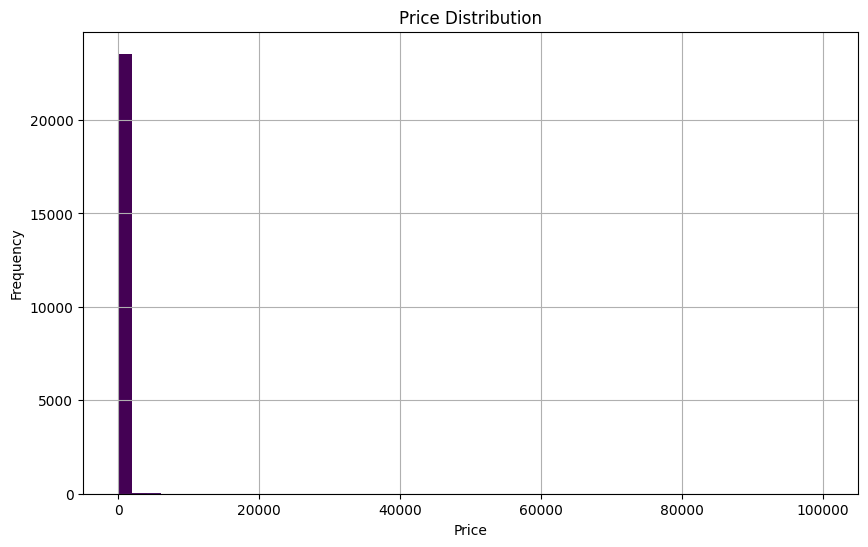

In [ ]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['price'], bins = 50, color = 'purple')

col = (bins[:-1] + bins[1:]) / 2
col -= min(col)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', plt.cm.viridis(c))

plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt

In [ ]:
filtered_df = df[df['price'] < 1000]
filtered_df.shape

(23256, 18)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

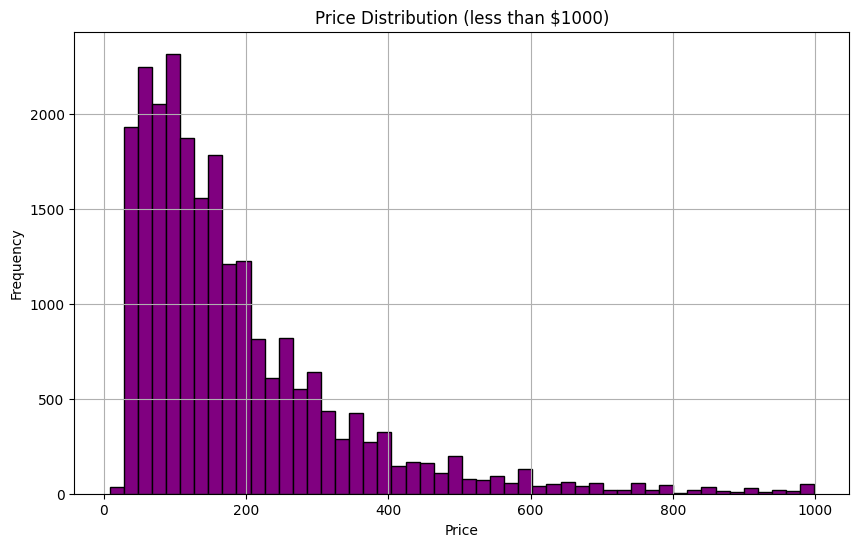

In [ ]:
plt.figure(figsize=(10, 6))

n, bins, patches = plt.hist(filtered_df['price'], bins = 50, color = 'purple', edgecolor = 'black')

col = (bins[:-1] + bins[1:]) / 2
col -= min(col)
col /= max(col)

plt.title('Price Distribution (less than $1000)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt

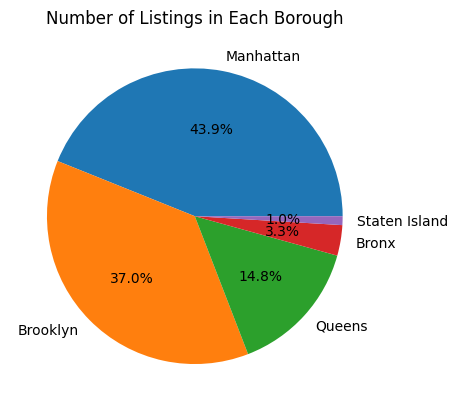

In [ ]:
num_in_each_borough = df['neighbourhood_group'].value_counts()
plt.pie(num_in_each_borough, labels=num_in_each_borough.index, autopct='%1.1f%%')
plt.title('Number of Listings in Each Borough')
plt.show()

In [ ]:
unique_neigborhoods = df['neighbourhood'].unique()
unique_neigborhoods

array(["Hell's Kitchen", 'Upper East Side', 'Jamaica', 'East Elmhurst',
       'Flushing', 'Woodside', 'Crown Heights', 'Ditmars Steinway',
       'Bayside', 'Williamsbridge', 'Long Island City', 'Dyker Heights',
       'Concord', 'Kips Bay', "Prince's Bay", 'Theater District',
       'Springfield Gardens', 'Sunset Park', 'Bellerose',
       'Queens Village', 'Mariners Harbor', 'Jamaica Estates',
       'West Farms', 'Allerton', 'Fort Greene', 'Fordham', 'Rosedale',
       'Washington Heights', 'Harlem', 'SoHo', 'Bedford-Stuyvesant',
       'Lower East Side', 'Clason Point', 'Sunnyside', 'Greenpoint',
       'Williamsburg', 'Kensington', 'Brighton Beach',
       'Morningside Heights', 'Bensonhurst', 'Greenwich Village',
       'Canarsie', 'East Flatbush', 'East New York', 'Arverne', 'Astoria',
       'Woodhaven', 'Clinton Hill', 'Park Slope', 'Midtown', 'Chelsea',
       'Bushwick', 'East Village', 'Financial District', 'Inwood',
       'Murray Hill', 'Mott Haven', 'Upper West Side', '

In [ ]:
neighbourhood_value = df['neighbourhood'].value_counts()
neighbourhood_value

neighbourhood
Bedford-Stuyvesant            2754
Williamsburg                  2252
Midtown                       1992
Harlem                        1801
Hell's Kitchen                1653
                              ... 
Neponsit                         1
New Dorp                         1
Fort Wadsworth                   1
Hollis Hills                     1
Bay Terrace, Staten Island       1
Name: count, Length: 225, dtype: int64

In [ ]:
relevant_neighbourhoods = neighbourhood_value[neighbourhood_value > 300].index.tolist()
relevant_neighbourhoods

['Bedford-Stuyvesant',
 'Williamsburg',
 'Midtown',
 'Harlem',
 "Hell's Kitchen",
 'Bushwick',
 'Upper West Side',
 'Upper East Side',
 'Crown Heights',
 'East Village',
 'Chelsea',
 'East Harlem',
 'Greenpoint',
 'Lower East Side',
 'Financial District',
 'Astoria',
 'Washington Heights',
 'East Flatbush',
 'Flatbush',
 'Flushing',
 'West Village',
 'Murray Hill',
 'Long Island City',
 'Theater District',
 'Kips Bay',
 'Woodside',
 'Prospect-Lefferts Gardens',
 'Ridgewood',
 'Clinton Hill',
 'Elmhurst',
 'Park Slope']

<ipython-input-13-9dbb90c09bc5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=relevant_neighbourhoods, y=df['neighbourhood'].value_counts()[relevant_neighbourhoods], palette='viridis')


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

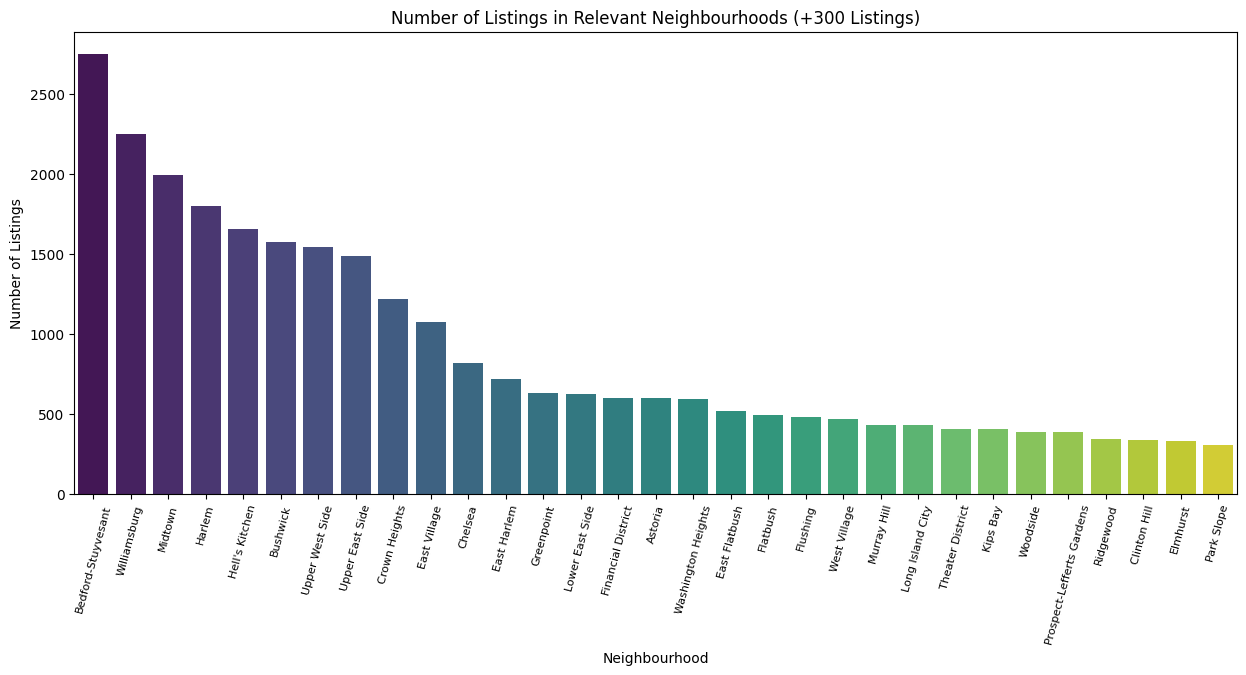

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(x=relevant_neighbourhoods, y=df['neighbourhood'].value_counts()[relevant_neighbourhoods], palette='viridis')
plt.title('Number of Listings in Relevant Neighbourhoods (+300 Listings)')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=75, fontsize=8)
plt


In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#excludes outliers
df_filtered_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

#average price of each neighborhood excluding outliers
avg_price_per_neighbourhood = df_filtered_outliers.groupby('neighbourhood')['price'].mean()
avg_price_per_neighbourhood

neighbourhood
Allerton           105.317073
Arden Heights      133.250000
Arrochar           132.777778
Arverne            135.015152
Astoria            126.218855
                      ...    
Windsor Terrace    171.365385
Woodhaven           93.552239
Woodlawn           138.888889
Woodrow            159.666667
Woodside            99.222798
Name: price, Length: 222, dtype: float64

In [ ]:
## gives all the listings in relevant neighbourhoods, stored in the filtered DataFrame

filtered_Rel_neighbourhoods_df = df[df['neighbourhood'].isin(relevant_neighbourhoods)]

filtered_Rel_neighbourhoods_df


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,794696802406920855,Lovely studio in Hell's Kitchen!,43305568,Rüya,Manhattan,Hell's Kitchen,40.762272,-73.995836,Entire home/apt,NaN,30,11,2024-03-01,0.69,1,0,5,NaN
1,6713005,Large one bedroom,35144920,Kevin,Manhattan,Upper East Side,40.767510,-73.955170,Private room,NaN,30,0,NaN,NaN,1,0,0,NaN
4,922527181364298444,New Flushing Modern Apartment,420975523,Will,Queens,Flushing,40.754404,-73.832370,Entire home/apt,202.0,30,11,2023-10-02,1.10,3,180,11,NaN
6,25274961,Beautiful cozy Room,37842947,Heena,Queens,Woodside,40.754070,-73.901900,Private room,125.0,30,4,2021-09-05,0.06,1,83,0,NaN
7,692726447958336704,The Merchant Marine,83143535,Michelle,Brooklyn,Crown Heights,40.677130,-73.942210,Private room,70.0,30,57,2023-11-07,2.73,13,364,27,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38188,1521335,Private Room in Brooklyn Brownstone,8120180,Ivey,Brooklyn,Bedford-Stuyvesant,40.681640,-73.950210,Private room,NaN,30,2,2016-07-09,0.02,1,0,0,NaN
38189,30215130,Large Newly Renovated 1 Bedroom Apartment,27245607,Sidney,Manhattan,West Village,40.733520,-74.003060,Entire home/apt,NaN,30,2,2019-03-11,0.03,1,0,0,NaN
38190,1085608400158135031,Full Bedroom 2C in #386: Hell's Kitchen,558528704,Elena,Manhattan,Hell's Kitchen,40.762042,-73.989955,Private room,106.0,30,0,NaN,NaN,9,308,0,NaN
38191,21205650,Comfy 1 bedroom suite in midtown manhattan,120762452,Stanley,Manhattan,Murray Hill,40.750360,-73.975380,Hotel room,180.0,30,0,NaN,NaN,83,365,0,NaN


In [ ]:
num_of_reviews = filtered_Rel_neighbourhoods_df.groupby('neighbourhood')['number_of_reviews'].sum()
sorted_list_of_reviews = num_of_reviews.sort_values(ascending=False)

sorted_list_of_reviews


neighbourhood
Bedford-Stuyvesant           95200
Harlem                       57715
Williamsburg                 50593
Crown Heights                33902
Bushwick                     32400
Hell's Kitchen               32099
Midtown                      30301
East Village                 24174
Upper West Side              21836
East Harlem                  20538
Astoria                      19659
Chelsea                      17994
Lower East Side              17595
Upper East Side              16166
East Flatbush                15477
Flushing                     14984
Park Slope                   14151
Clinton Hill                 12941
Flatbush                     12828
Financial District           12278
Greenpoint                   12269
Washington Heights           11836
Prospect-Lefferts Gardens    11110
Long Island City             10765
West Village                  8584
Elmhurst                      5984
Woodside                      5387
Ridgewood                     5159
Kips B

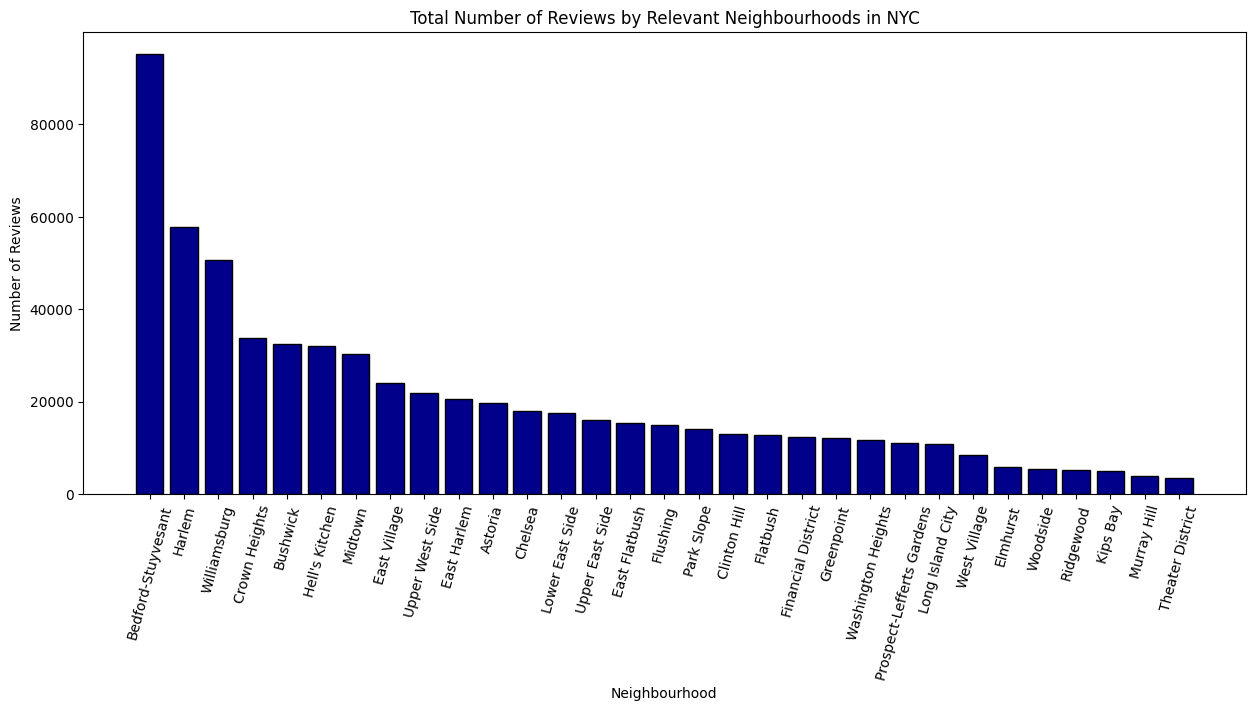

In [ ]:
plt.figure(figsize=(15, 6))
plt.bar(sorted_list_of_reviews.index, sorted_list_of_reviews.values, color = 'DarkBlue', edgecolor = 'black')
plt.title('Total Number of Reviews by Relevant Neighbourhoods in NYC')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=75)
plt.show()

In [ ]:
## some of the properties listed don't have a price, I identified the properties without prices and inserted the average price of a listing in that same neighbourhood to fill the missing values

missing_prices = df[df['price'].isna()]
missing_prices

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,794696802406920855,Lovely studio in Hell's Kitchen!,43305568,Rüya,Manhattan,Hell's Kitchen,40.762272,-73.995836,Entire home/apt,NaN,30,11,2024-03-01,0.69,1,0,5,NaN
1,6713005,Large one bedroom,35144920,Kevin,Manhattan,Upper East Side,40.767510,-73.955170,Private room,NaN,30,0,NaN,NaN,1,0,0,NaN
14,22252595,Perfect Stay to see all of Manhattan Sites,26984764,Lawrence,Queens,Long Island City,40.742280,-73.957080,Private room,NaN,30,1,2018-01-02,0.01,1,0,0,NaN
17,19459142,Comfy stay!,135696084,Dustin,Manhattan,Kips Bay,40.740480,-73.982620,Private room,NaN,30,0,NaN,NaN,1,0,0,NaN
19,9379983,Gooood Morning America!,48664130,Connor,Manhattan,Theater District,40.757260,-73.985230,Entire home/apt,NaN,30,1,2015-12-06,0.01,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38185,27788826,Upper East Side 2 Room Studio Retreat,11376647,Nicholas,Manhattan,Upper East Side,40.767850,-73.953440,Entire home/apt,NaN,30,3,2018-09-16,0.04,1,0,0,NaN
38186,1276760,1bedroom apartment in Williamsburg,6949594,Sego,Brooklyn,Williamsburg,40.710330,-73.956200,Entire home/apt,NaN,30,10,2015-12-19,0.08,1,0,0,NaN
38187,29657991,1BR Apartment close to Prospect Park,16502641,Marni,Brooklyn,South Slope,40.661060,-73.986341,Entire home/apt,NaN,30,19,2023-06-20,0.29,1,7,1,NaN
38188,1521335,Private Room in Brooklyn Brownstone,8120180,Ivey,Brooklyn,Bedford-Stuyvesant,40.681640,-73.950210,Private room,NaN,30,2,2016-07-09,0.02,1,0,0,NaN


In [ ]:
mean_prices_by_neighbourhood = df.groupby('neighbourhood')['price'].mean()
mean_prices_by_neighbourhood

def impute_price(row):
    if pd.isna(row['price']):
        return mean_prices_by_neighbourhood[row['neighbourhood']]
    else:
        return row['price']

df['price'] = df.apply(impute_price, axis=1)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,794696802406920855,Lovely studio in Hell's Kitchen!,43305568,Rüya,Manhattan,Hell's Kitchen,40.762272,-73.995836,Entire home/apt,270.520985,30,11,2024-03-01,0.69,1,0,5,NaN
1,6713005,Large one bedroom,35144920,Kevin,Manhattan,Upper East Side,40.767510,-73.955170,Private room,261.551125,30,0,NaN,NaN,1,0,0,NaN
2,54294086,Luxury 1- bedroom rental unit with Hot tub,440355290,Tavian,Queens,Jamaica,40.697390,-73.792790,Private room,342.000000,30,0,NaN,NaN,1,365,0,NaN
3,1039262508734112133,Private room close to LGA,430854617,Bryan,Queens,East Elmhurst,40.758789,-73.867923,Private room,105.000000,1,19,2024-04-27,3.77,3,242,19,Exempt
4,922527181364298444,New Flushing Modern Apartment,420975523,Will,Queens,Flushing,40.754404,-73.832370,Entire home/apt,202.000000,30,11,2023-10-02,1.10,3,180,11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38194,1023555479605761306,SunnyHome9(Location in Flushing）,45600001,Amy,Queens,Little Neck,40.772081,-73.734067,Private room,70.000000,1,15,2024-04-11,3.33,9,60,15,NaN
38195,1048166471586307693,Bed & Breakfast #2: 15 mins to JFK & LGA Airport,50654265,Shujuan,Queens,Briarwood,40.712313,-73.812866,Private room,83.000000,1,20,2024-05-03,15.38,2,146,20,OSE-STRREG-0001494
38196,828152028875658486,small room,389706319,Noura,Staten Island,Woodrow,40.547509,-74.190271,Private room,60.000000,30,1,2023-03-29,0.07,2,364,0,NaN
38197,53623920,Modern Private Queen Bed in prime location,105379950,Frederick,Brooklyn,Sheepshead Bay,40.586750,-73.953430,Private room,89.000000,2,48,2024-04-26,1.63,3,199,29,OSE-STRREG-0000679


In [ ]:
import folium
import IPython
from IPython.display import display

mean_lat = df['latitude'].mean()
mean_lon = df['longitude'].mean()


my_map = folium.Map(location=[mean_lat, mean_lon], zoom_start=11)


df.dropna(subset=['latitude', 'longitude', 'price'], inplace=True)


heat_data = [[row['latitude'], row['longitude'], row['price']] for index, row in df.iterrows()]

from folium.plugins import HeatMap
HeatMap(heat_data).add_to(my_map)

display(my_map)


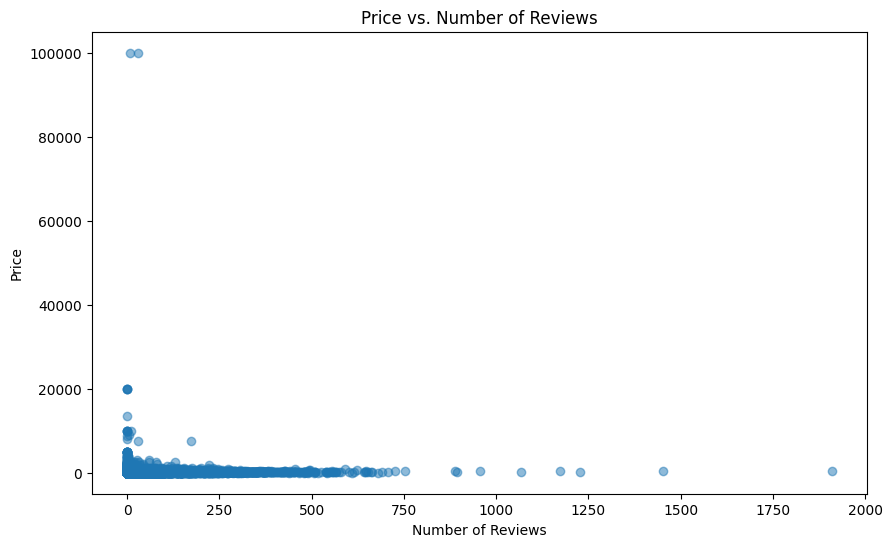

Correlation between price and number of reviews: -0.015396436220169367


In [ ]:
# Scatter plot for number of reviews vs. price
plt.figure(figsize=(10, 6))
plt.scatter(df['number_of_reviews'], df['price'], alpha=0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Price vs. Number of Reviews')
plt.show()

# Correlation coefficient
print("Correlation between price and number of reviews:", df['price'].corr(df['number_of_reviews']))


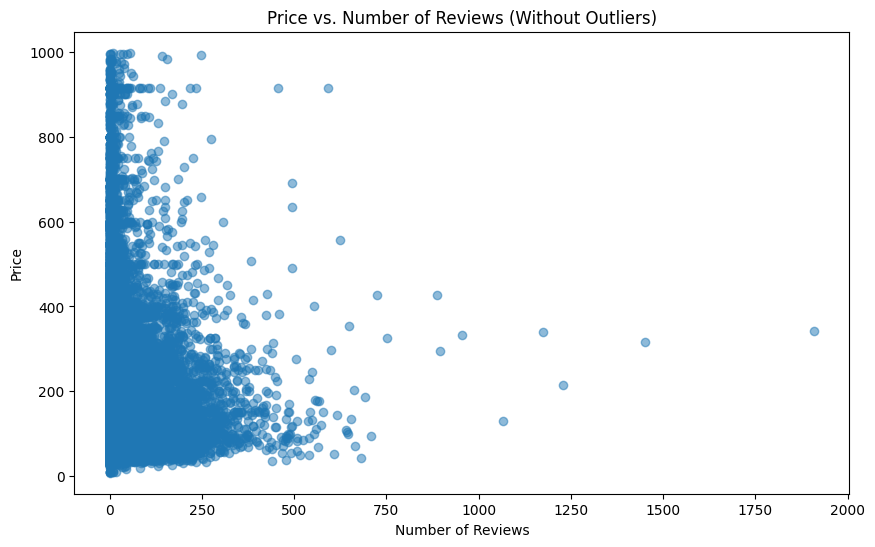

In [ ]:
# Remove outliers
price_threshold = df['price'].quantile(0.99)
df_filtered = df[df['price'] < price_threshold]


plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['number_of_reviews'], df_filtered['price'], alpha=0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Price vs. Number of Reviews (Without Outliers)')
plt.show()

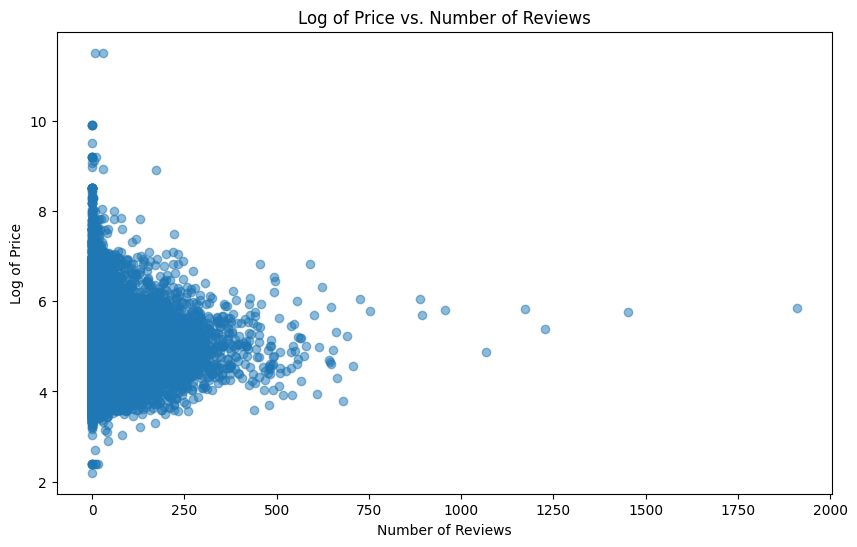

In [ ]:
# Apply log transformation to the price data
df['log_price'] = np.log1p(df['price'])  # Use log1p to handle zero values

# Plot with log-transformed prices
plt.figure(figsize=(10, 6))
plt.scatter(df['number_of_reviews'], df['log_price'], alpha=0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Log of Price')
plt.title('Log of Price vs. Number of Reviews')
plt.show()

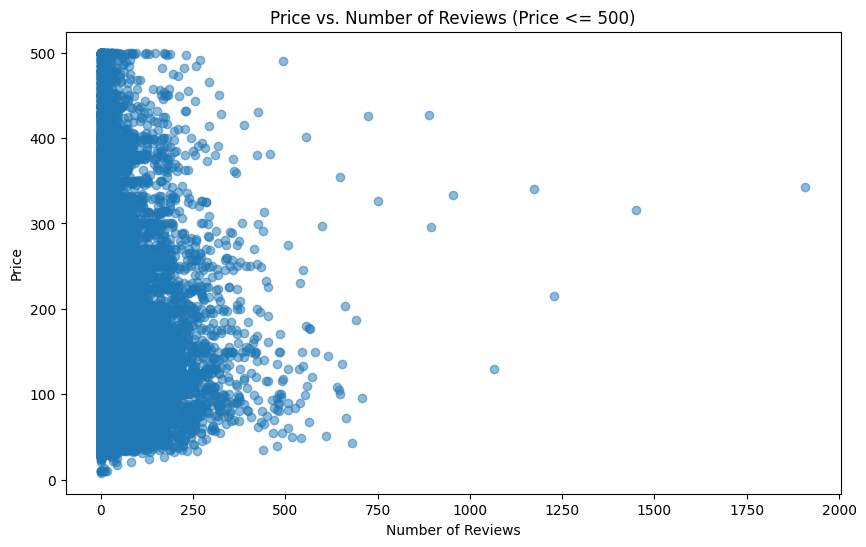

In [ ]:
# Focus on listings with prices below a certain threshold
price_cap = 500  # Set your desired price cap
df_capped = df[df['price'] <= price_cap]

# Plot again with capped prices
plt.figure(figsize=(10, 6))
plt.scatter(df_capped['number_of_reviews'], df_capped['price'], alpha=0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Price vs. Number of Reviews (Price <= 500)')
plt.show()

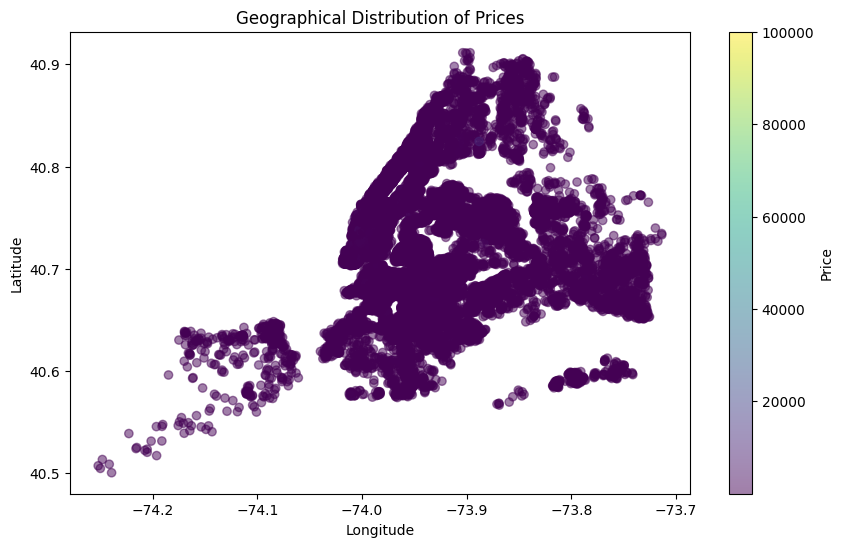

In [ ]:
# Scatter plot for latitude and longitude vs. price
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['price'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Prices')
plt.show()